In [3]:
# Time - Series Forecasting 
import pandas as pd
import numpy as np
import seaborn as sns

Your task is to aggregate the observations on an interval of 30 minutes. For this time interval, using the values of the 5 previous time intervals, forecast the target value one step in the future. Choose which features you are going to use.

You must train an LSTM network.

In [162]:
df = pd.read_csv('dataset/power_consumption_g1_feat.csv')

In [15]:
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900
...,...,...,...,...,...,...
52411,2017-05-14 02:20:00,23.58,43.10,0.075,0.110,0.122
52412,2017-11-17 19:20:00,17.30,76.50,0.075,0.040,0.148
52413,2017-03-21 12:10:00,17.90,50.28,0.081,837.000,296.700
52414,2017-07-28 05:10:00,25.23,61.32,4.907,0.091,0.119


In [164]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index(keys=['Datetime'], inplace=True)
df.sort_index(inplace=True)

In [21]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Datetime,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074


In [166]:
target = pd.read_csv('dataset/power_consumption_g1.csv')

In [168]:
target

,Datetime,PowerConsumption
0,2017-10-04 02:20:00,26802.27571
1,2017-05-28 13:20:00,32898.09836
2,2017-03-15 06:00:00,22304.68085
3,2017-10-31 11:40:00,32316.49891
4,2017-04-20 02:50:00,23982.43272
...,...,...
52411,2017-05-27 13:30:00,35000.65574
52412,2017-10-29 20:10:00,39425.12035
52413,2017-02-05 16:10:00,28751.18644
52414,2017-04-11 17:20:00,32098.51453


In [170]:
target['Datetime'] = pd.to_datetime(target['Datetime'])
target.set_index(keys=['Datetime'], inplace=True)
target.sort_index(inplace=True)

In [41]:
target

,PowerConsumption
Datetime,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825
2017-12-30 23:30:00,29590.87452


In [172]:
df_merged = pd.merge(left = df, right = target, right_index=True, left_index=True)

In [47]:
df_merged

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [174]:
df_merged.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
PowerConsumption         0
dtype: int64

In [176]:
features = [col for col in df_merged.columns if col not in ['PowerConsumption']]
target = 'PowerConsumption'

In [132]:
features

['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']

In [134]:
target

['PowerConsumption']

In [178]:
# Popolnuvanje missing values 
for feature in features:
    df_merged[feature] = df_merged[feature].interpolate(method='linear')

In [180]:
df_merged.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
PowerConsumption       0
dtype: int64

In [182]:
# Group the datasets into time intervals of 30 mintues

df_merged = df_merged.groupby(pd.Grouper(freq='30min')).mean()

In [184]:
df_merged

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.055000,0.107667,33326.235743


<Axes: xlabel='Datetime', ylabel='Temperature'>

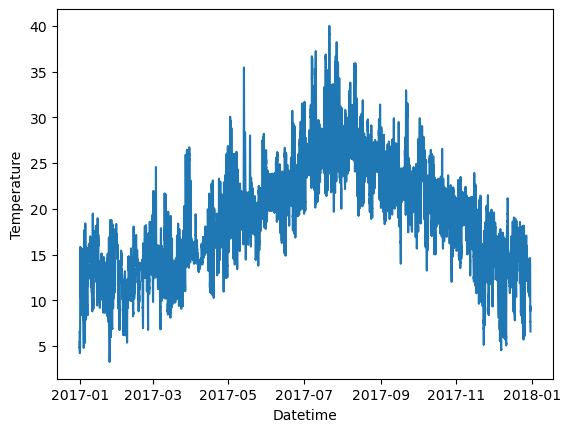

In [186]:
sns.lineplot(df["Temperature"])

<Axes: xlabel='Datetime', ylabel='DiffuseFlows'>

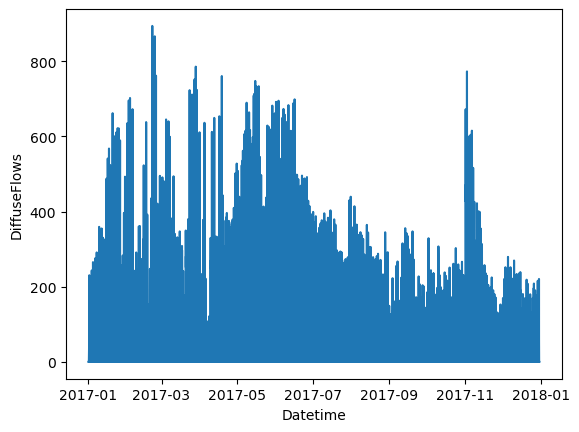

In [72]:
sns.lineplot(df["DiffuseFlows"])

<Axes: xlabel='Datetime', ylabel='WindSpeed'>

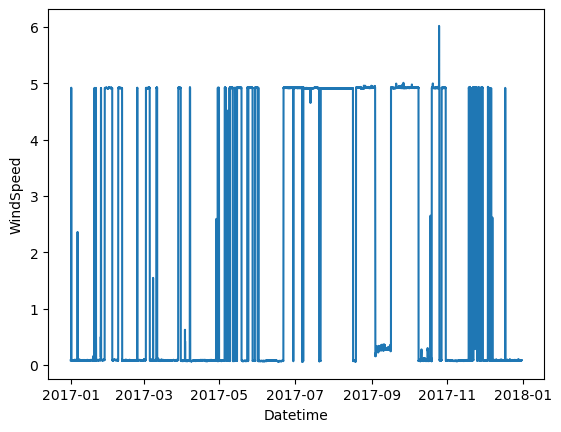

In [74]:
sns.lineplot(df["WindSpeed"])

<Axes: >

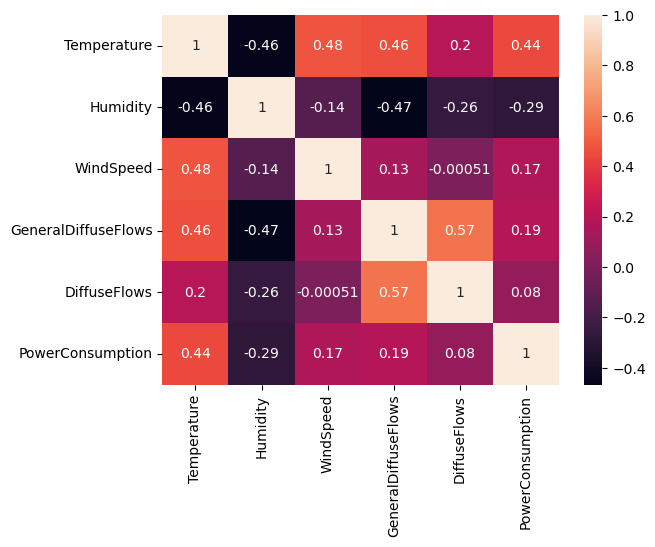

In [76]:
sns.heatmap(df_merged.corr(), annot=True)

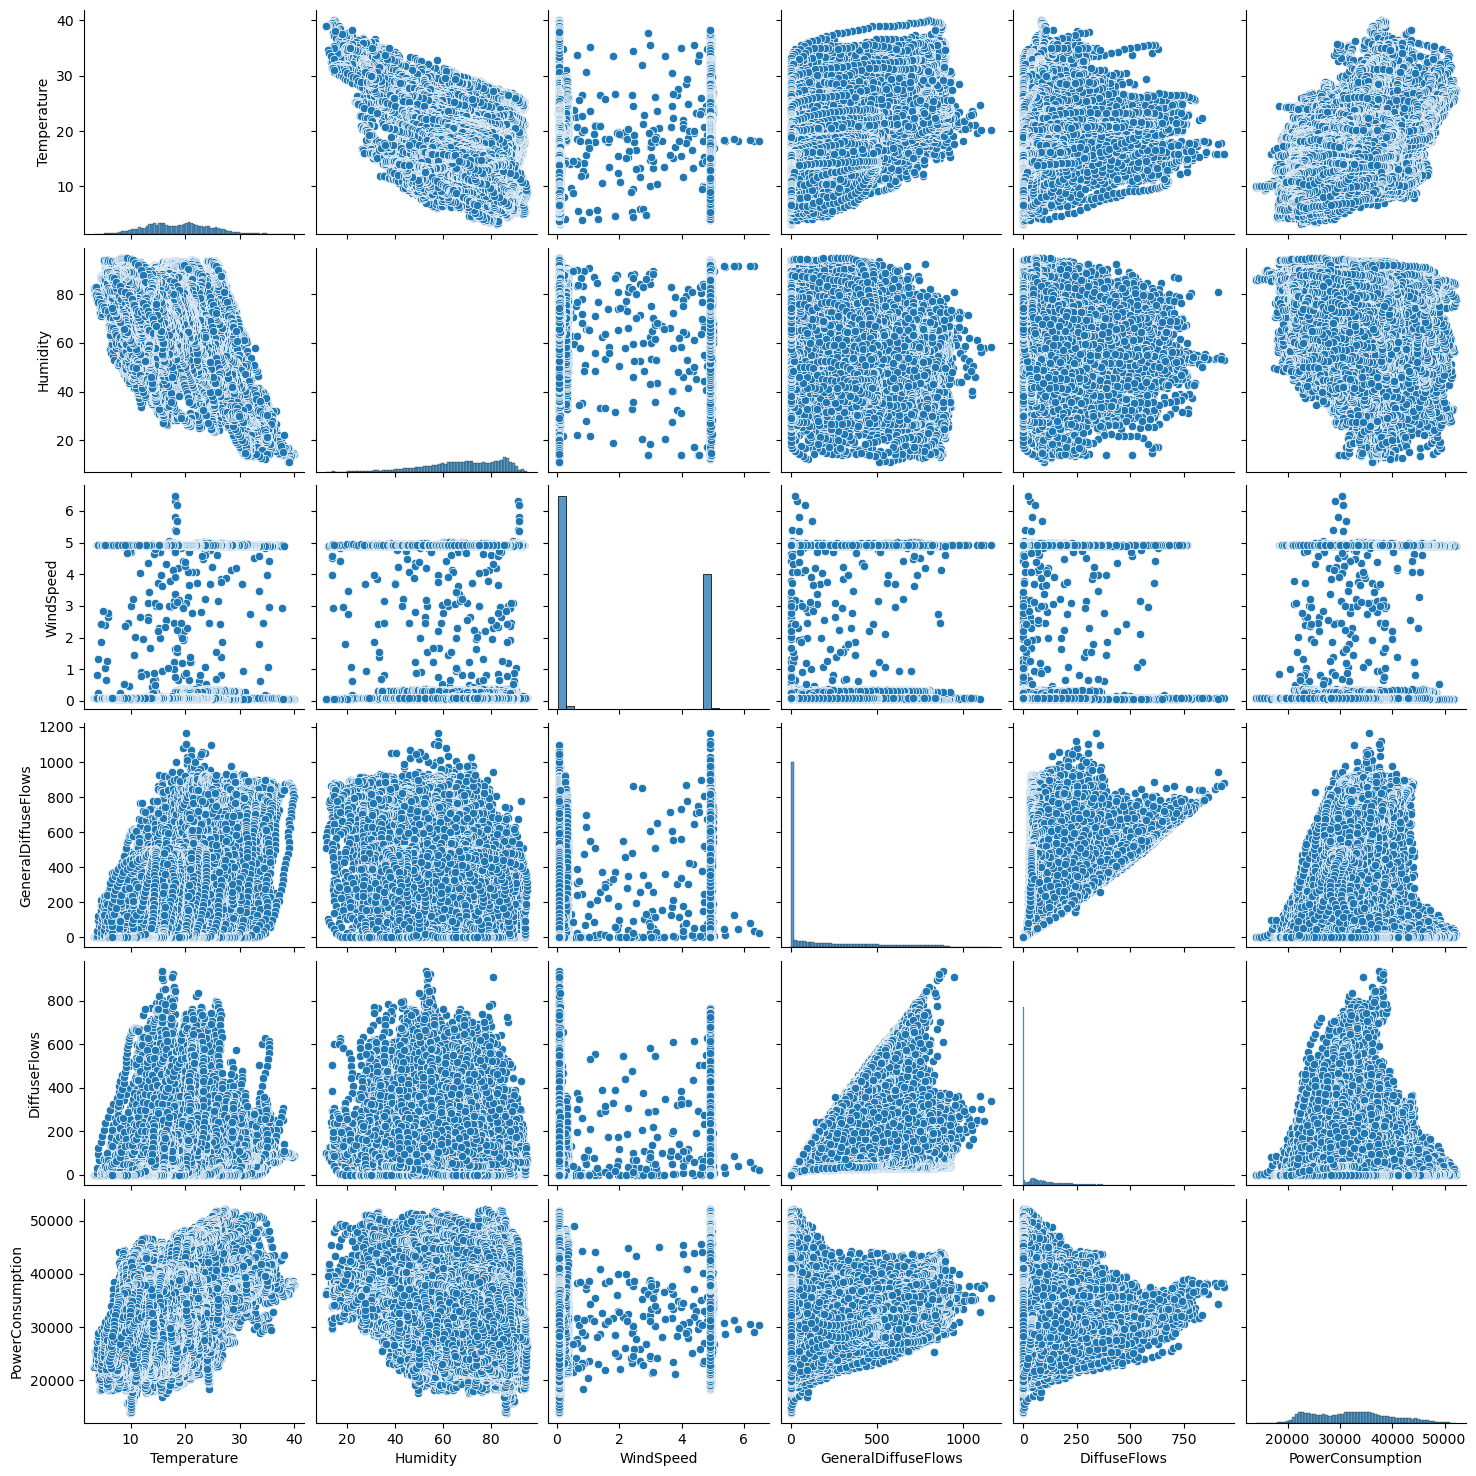

In [78]:
sns.pairplot(df_merged)

In [188]:
df_merged

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption
Datetime,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.055000,0.107667,33326.235743


In [190]:
for lag in range(5, 0, -1):
    for column in features + [target]:
        df_merged[f'{column}_lag{lag}'] = df_merged[column].shift(lag)

In [192]:
df_merged

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption,Temperature_lag5,Humidity_lag5,WindSpeed_lag5,GeneralDiffuseFlows_lag5,...,WindSpeed_lag2,GeneralDiffuseFlows_lag2,DiffuseFlows_lag2,PowerConsumption_lag2,Temperature_lag1,Humidity_lag1,WindSpeed_lag1,GeneralDiffuseFlows_lag1,DiffuseFlows_lag1,PowerConsumption_lag1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 01:00:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937,NaN,NaN,NaN,NaN,...,0.082000,0.061000,0.101333,30999.493670,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:30:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443,NaN,NaN,NaN,NaN,...,0.081667,0.066000,0.096333,27396.455697,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 02:00:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707,NaN,NaN,NaN,NaN,...,0.082000,0.056333,0.110000,25407.594937,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787,9.710000,61.685000,0.075000,0.052667,...,0.086000,0.066000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.077000,0.109000,35930.038023
2017-12-30 22:00:00,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017,9.196667,63.106667,0.074333,0.051333,...,0.081333,0.077000,0.109000,35930.038023,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:30:00,7.403333,71.066667,0.082667,0.055000,0.107667,33326.235743,8.933333,63.473333,0.074667,0.039333,...,0.081667,0.069333,0.087667,34786.311787,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017


In [194]:
df_merged.drop(columns=features, inplace=True)

In [196]:
df_merged

,PowerConsumption,Temperature_lag5,Humidity_lag5,WindSpeed_lag5,GeneralDiffuseFlows_lag5,DiffuseFlows_lag5,PowerConsumption_lag5,Temperature_lag4,Humidity_lag4,WindSpeed_lag4,...,WindSpeed_lag2,GeneralDiffuseFlows_lag2,DiffuseFlows_lag2,PowerConsumption_lag2,Temperature_lag1,Humidity_lag1,WindSpeed_lag1,GeneralDiffuseFlows_lag1,DiffuseFlows_lag1,PowerConsumption_lag1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,30999.493670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,27396.455697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670
2017-01-01 01:00:00,25407.594937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.082000,0.061000,0.101333,30999.493670,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697
2017-01-01 01:30:00,23906.835443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.081667,0.066000,0.096333,27396.455697,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937
2017-01-01 02:00:00,22474.936707,NaN,NaN,NaN,NaN,NaN,NaN,6.428667,74.266667,0.082000,...,0.082000,0.056333,0.110000,25407.594937,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,34786.311787,9.710000,61.685000,0.075000,0.052667,0.108667,37690.240813,9.196667,63.106667,0.074333,...,0.086000,0.066000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.077000,0.109000,35930.038023
2017-12-30 22:00:00,34660.583017,9.196667,63.106667,0.074333,0.051333,0.095333,37337.389100,8.933333,63.473333,0.074667,...,0.081333,0.077000,0.109000,35930.038023,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:30:00,33326.235743,8.933333,63.473333,0.074667,0.039333,0.120000,37171.102660,9.150000,64.506667,0.086000,...,0.081667,0.069333,0.087667,34786.311787,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017


In [198]:
df_merged.dropna(axis=0, inplace=True)

In [200]:
df_merged

,PowerConsumption,Temperature_lag5,Humidity_lag5,WindSpeed_lag5,GeneralDiffuseFlows_lag5,DiffuseFlows_lag5,PowerConsumption_lag5,Temperature_lag4,Humidity_lag4,WindSpeed_lag4,...,WindSpeed_lag2,GeneralDiffuseFlows_lag2,DiffuseFlows_lag2,PowerConsumption_lag2,Temperature_lag1,Humidity_lag1,WindSpeed_lag1,GeneralDiffuseFlows_lag1,DiffuseFlows_lag1,PowerConsumption_lag1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 02:30:00,21691.139240,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670,5.941000,75.866667,0.081667,...,0.082000,0.057333,0.115000,23906.835443,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
2017-01-01 03:00:00,20992.405063,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697,5.605000,77.900000,0.082000,...,0.082667,0.065000,0.127333,22474.936707,5.108000,79.100000,0.082000,0.061000,0.131000,21691.139240
2017-01-01 03:30:00,20629.873417,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937,5.492667,77.166667,0.082000,...,0.082000,0.061000,0.131000,21691.139240,5.097000,77.600000,0.082667,0.059667,0.130000,20992.405063
2017-01-01 04:00:00,20512.405063,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443,5.000667,78.766667,0.082667,...,0.082667,0.059667,0.130000,20992.405063,4.911667,76.566667,0.083000,0.060000,0.152000,20629.873417
2017-01-01 04:30:00,20439.493670,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707,5.108000,79.100000,0.082000,...,0.083000,0.060000,0.152000,20629.873417,4.952333,74.733333,0.083667,0.058667,0.117333,20512.405063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,34786.311787,9.710000,61.685000,0.075000,0.052667,0.108667,37690.240813,9.196667,63.106667,0.074333,...,0.086000,0.066000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.077000,0.109000,35930.038023
2017-12-30 22:00:00,34660.583017,9.196667,63.106667,0.074333,0.051333,0.095333,37337.389100,8.933333,63.473333,0.074667,...,0.081333,0.077000,0.109000,35930.038023,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:30:00,33326.235743,8.933333,63.473333,0.074667,0.039333,0.120000,37171.102660,9.150000,64.506667,0.086000,...,0.081667,0.069333,0.087667,34786.311787,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017


In [202]:
x = df_merged.drop(columns=target)
y = df_merged[target]

In [204]:
x

,Temperature_lag5,Humidity_lag5,WindSpeed_lag5,GeneralDiffuseFlows_lag5,DiffuseFlows_lag5,PowerConsumption_lag5,Temperature_lag4,Humidity_lag4,WindSpeed_lag4,GeneralDiffuseFlows_lag4,...,WindSpeed_lag2,GeneralDiffuseFlows_lag2,DiffuseFlows_lag2,PowerConsumption_lag2,Temperature_lag1,Humidity_lag1,WindSpeed_lag1,GeneralDiffuseFlows_lag1,DiffuseFlows_lag1,PowerConsumption_lag1
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 02:30:00,6.428667,74.266667,0.082000,0.061000,0.101333,30999.493670,5.941000,75.866667,0.081667,0.066000,...,0.082000,0.057333,0.115000,23906.835443,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707
2017-01-01 03:00:00,5.941000,75.866667,0.081667,0.066000,0.096333,27396.455697,5.605000,77.900000,0.082000,0.056333,...,0.082667,0.065000,0.127333,22474.936707,5.108000,79.100000,0.082000,0.061000,0.131000,21691.139240
2017-01-01 03:30:00,5.605000,77.900000,0.082000,0.056333,0.110000,25407.594937,5.492667,77.166667,0.082000,0.057333,...,0.082000,0.061000,0.131000,21691.139240,5.097000,77.600000,0.082667,0.059667,0.130000,20992.405063
2017-01-01 04:00:00,5.492667,77.166667,0.082000,0.057333,0.115000,23906.835443,5.000667,78.766667,0.082667,0.065000,...,0.082667,0.059667,0.130000,20992.405063,4.911667,76.566667,0.083000,0.060000,0.152000,20629.873417
2017-01-01 04:30:00,5.000667,78.766667,0.082667,0.065000,0.127333,22474.936707,5.108000,79.100000,0.082000,0.061000,...,0.083000,0.060000,0.152000,20629.873417,4.952333,74.733333,0.083667,0.058667,0.117333,20512.405063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 21:30:00,9.710000,61.685000,0.075000,0.052667,0.108667,37690.240813,9.196667,63.106667,0.074333,0.051333,...,0.086000,0.066000,0.090000,36846.641317,8.110000,69.006667,0.081333,0.077000,0.109000,35930.038023
2017-12-30 22:00:00,9.196667,63.106667,0.074333,0.051333,0.095333,37337.389100,8.933333,63.473333,0.074667,0.039333,...,0.081333,0.077000,0.109000,35930.038023,7.913333,70.343333,0.081667,0.069333,0.087667,34786.311787
2017-12-30 22:30:00,8.933333,63.473333,0.074667,0.039333,0.120000,37171.102660,9.150000,64.506667,0.086000,0.066000,...,0.081667,0.069333,0.087667,34786.311787,7.793333,69.563333,0.081000,0.062333,0.108667,34660.583017


In [208]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 17467 entries, 2017-01-01 02:30:00 to 2017-12-30 23:30:00
Freq: 30min
Series name: PowerConsumption
Non-Null Count  Dtype  
--------------  -----  
17467 non-null  float64
dtypes: float64(1)
memory usage: 272.9 KB


In [210]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [214]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [216]:
scaler = MinMaxScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

In [220]:
x_train.shape

(13973, 30)

In [226]:
lags = 5

In [228]:
# (samples, lags, features)
(x_train.shape[0], lags, (x_train.shape[1] // lags))

(13973, 5, 6)

In [230]:
x_train = x_train.reshape((x_train.shape[0], lags , (x_train.shape[1] // lags)))
x_test = x_test.reshape((x_test.shape[0], lags, (x_test.shape[1] // lags )))

In [232]:
x_train

array([[[8.29843963e-02, 7.61614189e-01, 5.98520511e-03, 4.76649421e-05,
         6.78882068e-05, 4.47375294e-01],
        [6.95797180e-02, 7.81140672e-01, 5.91795562e-03, 5.24314364e-05,
         6.22930249e-05, 3.53020742e-01],
        [6.03439587e-02, 8.05955577e-01, 5.98520511e-03, 4.32162142e-05,
         7.75865220e-05, 3.00937454e-01],
        [5.72562099e-02, 7.97005939e-01, 5.98520511e-03, 4.41695131e-05,
         8.31817039e-05, 2.61636316e-01],
        [4.37324195e-02, 8.16532422e-01, 6.11970410e-03, 5.14781375e-05,
         9.69831525e-05, 2.24138470e-01]],

       [[6.95797180e-02, 7.81140672e-01, 5.91795562e-03, 5.24314364e-05,
         6.22930249e-05, 3.53020742e-01],
        [6.03439587e-02, 8.05955577e-01, 5.98520511e-03, 4.32162142e-05,
         7.75865220e-05, 3.00937454e-01],
        [5.72562099e-02, 7.97005939e-01, 5.98520511e-03, 4.41695131e-05,
         8.31817039e-05, 2.61636316e-01],
        [4.37324195e-02, 8.16532422e-01, 6.11970410e-03, 5.14781375e-05,
     

In [238]:
y_train.shape

(13973, 1)

In [236]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [242]:

model = Sequential([
    Input((x_train.shape[1], x_train.shape[2], )),
    LSTM(64, activation = 'relu', return_sequences=True),
    LSTM(32, activation = 'relu'),
    Dense(y_train.shape[1], activation='linear')
])

In [244]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

In [270]:
history = model.fit(x_train, y_train, batch_size=32, epochs=16, shuffle=False, validation_split=0.2)

Epoch 1/16
350/350 [==============================] - 1s 2ms/step - loss: 3.8602e-04 - mean_squared_error: 3.8602e-04 - val_loss: 4.7653e-04 - val_mean_squared_error: 4.7653e-04
Epoch 2/16
350/350 [==============================] - 1s 2ms/step - loss: 3.5400e-04 - mean_squared_error: 3.5400e-04 - val_loss: 4.0215e-04 - val_mean_squared_error: 4.0215e-04
Epoch 3/16
350/350 [==============================] - 1s 2ms/step - loss: 3.3665e-04 - mean_squared_error: 3.3665e-04 - val_loss: 3.9486e-04 - val_mean_squared_error: 3.9486e-04
Epoch 4/16
350/350 [==============================] - 1s 2ms/step - loss: 3.3692e-04 - mean_squared_error: 3.3692e-04 - val_loss: 4.0279e-04 - val_mean_squared_error: 4.0279e-04
Epoch 5/16
350/350 [==============================] - 1s 2ms/step - loss: 3.4042e-04 - mean_squared_error: 3.4042e-04 - val_loss: 4.3518e-04 - val_mean_squared_error: 4.3518e-04
Epoch 6/16
350/350 [==============================] - 1s 2ms/step - loss: 3.3399e-04 - mean_squared_error: 3.3

<Axes: >

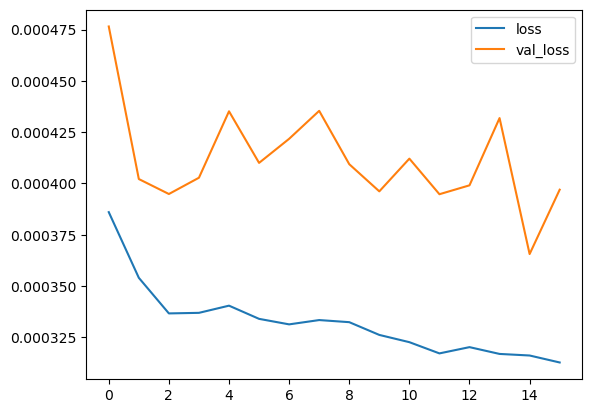

In [272]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [286]:
y_pred = model.predict(x_test)

110/110 [==============================] - 0s 622us/step


In [288]:
y_pred = scaler.inverse_transform(y_pred)

In [290]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(r2_score(y_test, y_pred))

0.9818819438061716
